In [72]:
FILE = 0                # В базе данных находится 48 записей
CHANNEL = 0             # в каждой записи по два канала.    
SAMPLE_START = 0        # Начало отсчетов в файле
SAMPLE_SIZE = 4000      # Количество отсчетов (360 в секунду).

# Инициализация



In [73]:
# индикатор прогресса
!pip install tqdm 
# библиотека для считывания файлов из MIT BIH базы данных
!pip install wfdb 

In [75]:
import wfdb as wf
import numpy as np                    # поддержка для многомерных массивов
from datasets import mitdb as dm      # MIT BIH базы данных
from matplotlib import pyplot as plt  # библиотека для построения графиков

# Загрузка файла
Выбор одного файла из базы данных MIT-BIH и его загрузка

In [76]:
# Загрузка доступных файлов из базы данных  
dbfiles = dm.get_records()
print('Количество файлов: ', len(dbfiles)) # Количество файлов

# Выбор файла и его загрузка
datfile = dbfiles[FILE]
print('Загрузка файла:', datfile) 

# Считывание файла и аннотации
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# информация о записи
print('Частота дискретизации:', record[1].get('fs'), 'Гц')
print('Форма файла:', record[0].shape)
print('Аннотаций:', len(annotation.num))

Загрузка mitdb database...


HTTPError: HTTP Error 404: Not Found

# Построение
Визуализация выбранного файла. Отображаются данные пульса и связанные с ними аннотации.

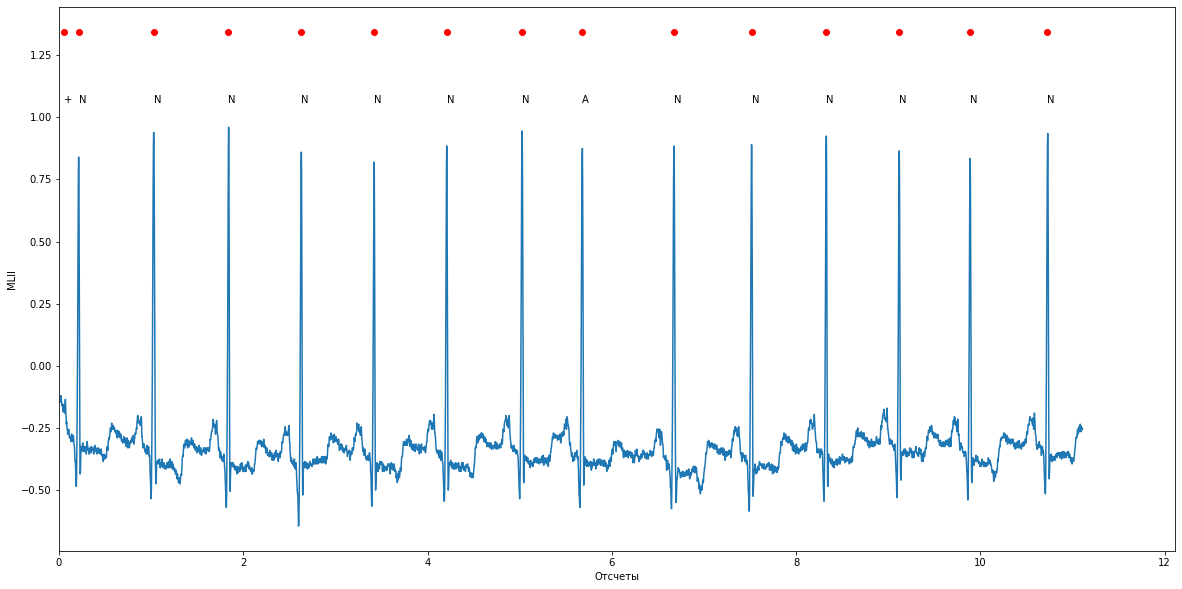

In [23]:
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Выбор отрезка из последовательности данных одного канала 
sample_end = SAMPLE_START + SAMPLE_SIZE
channel = record[0][SAMPLE_START:sample_end, CHANNEL]

# Построение ЭКГ. Шкала времени - количество отсчетов
# деленное на частоту дискретизации.
times = (np.arange(SAMPLE_SIZE, dtype = 'float') + SAMPLE_START) / record[1].get('fs')
plt.figure(figsize=(20,10))
plt.plot(times, channel)

# Извлечение аннотаций
where = np.logical_and(annotation.sample >= SAMPLE_START, annotation.sample < sample_end)
annots = annotation.sample[where] - SAMPLE_START
annotypes = np.array(annotation.symbol) # символ аннотации
annotypes = annotypes[where]

# Добавление положения аннотаций на график
annotimes = times[annots]
plt.plot(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, 'ro')

#Коды аннотаций.
for idx, annot in enumerate(annots):
    plt.annotate(annotypes[idx], xy = (times[annot], channel.max() * 1.1))

plt.xlim([SAMPLE_START / record[1].get('fs'), (sample_end / record[1].get('fs')) + 1])
plt.xlabel('Отсчеты')
plt.ylabel(record[1].get('sig_name')[CHANNEL])
plt.show()